In [2]:
import pandas as pd

# Convertir archivos Parquet a CSV
amarillo_df = pd.read_parquet('Taxis/viajes_taxis_Amarilo.parquet', engine='pyarrow')
amarillo_df.to_csv('viajes_taxis_Amarilo.csv', index=False)

verde_df = pd.read_parquet('Taxis/viajes_taxis_Verdes.parquet', engine='pyarrow')
verde_df.to_csv('viajes_taxis_Verdes.csv', index=False)


Por una cuestión de optmización de memoria vamos a reducir al 20% los data set de taxis. 

In [9]:
import pandas as pd

# Cargar el archivo CSV original
input_file = 'viajes_taxis_Amarilo.csv'  # Cambia esto al nombre de tu archivo CSV
output_file = 'viajes_taxis_Amarilo_reducido.csv'  # Nombre del archivo reducido

# Leer el CSV original
df = pd.read_csv(input_file)

# Tomar el 20% de las filas de forma aleatoria
df_reducido = df.sample(frac=0.02, random_state=42)  # Cambia el seed si deseas resultados diferentes

# Guardar el nuevo archivo reducido
df_reducido.to_csv(output_file, index=False)

print(f"Archivo reducido guardado como: {output_file}")


Archivo reducido guardado como: viajes_taxis_Amarilo_reducido.csv


In [6]:
import pandas as pd

# Cargar el archivo CSV original
input_file = 'viajes_taxis_Verdes.csv'  # Cambia esto al nombre de tu archivo CSV
output_file = 'viajes_taxis_Verdes_reducido.csv'  # Nombre del archivo reducido

# Leer el CSV original
df2 = pd.read_csv(input_file)

# Tomar el 20% de las filas de forma aleatoria
df_reducido = df2.sample(frac=0.2, random_state=42)  # Cambia el seed si deseas resultados diferentes

# Guardar el nuevo archivo reducido
df_reducido.to_csv(output_file, index=False)

print(f"Archivo reducido guardado como: {output_file}")


Archivo reducido guardado como: viajes_taxis_Verdes_reducido.csv


In [2]:
import pandas as pd

# Cargar los archivos nuevamente
amarillo_path = 'viajes_taxis_Amarilo_reducido.csv'
verde_path = 'viajes_taxis_Verdes_reducido.csv'

amarillo_df = pd.read_csv(amarillo_path)
verde_df = pd.read_csv(verde_path)

# Explorar las primeras filas y columnas de los datos
amarillo_head = amarillo_df.head()
verde_head = verde_df.head()

amarillo_info = amarillo_df.info()
verde_info = verde_df.info()

amarillo_head, verde_head, 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431950 entries, 0 to 431949
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   passenger_count     409114 non-null  float64
 1   trip_distance       431950 non-null  float64
 2   payment_type        431950 non-null  int64  
 3   day_pickup          431950 non-null  int64  
 4   hour_pickup         431950 non-null  int64  
 5   year                431950 non-null  int64  
 6   mes                 431950 non-null  int64  
 7   duracion del viaje  431950 non-null  float64
 8   tarifa - peajes     431950 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 29.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425063 entries, 0 to 425062
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   passenger_count     391982 non-null  float64
 1   trip_distance       4250

(   passenger_count  trip_distance  payment_type  day_pickup  hour_pickup  \
 0              1.0          19.80             1           4           19   
 1              NaN          10.56             0          13           18   
 2              5.0           8.04             1          22            6   
 3              1.0           1.03             1          18           17   
 4              1.0           3.30             1           5            6   
 
    year  mes  duracion del viaje  tarifa - peajes  
 0  2022   12           45.500000            67.86  
 1  2023    4           38.000000            47.03  
 2  2022    7           12.316667            30.96  
 3  2022    8            8.550000            13.56  
 4  2023    1           14.000000            25.20  ,
    passenger_count  trip_distance  payment_type  day_pickup  hour_pickup  \
 0              1.0           1.23           1.0          10           20   
 1              6.0           1.04           2.0          27   

In [4]:
import pandas as pd

# Cargar datos de taxis amarillos y verdes
amarillo_path = 'viajes_taxis_Amarilo_reducido.csv'
verde_path = 'viajes_taxis_Verdes_reducido.csv'

amarillo_df = pd.read_csv(amarillo_path)
verde_df = pd.read_csv(verde_path)

# Concatenar ambos datasets
viajes_df = pd.concat([amarillo_df, verde_df], ignore_index=True)

# Crear una columna de timestamp (si no existe) para análisis temporal
viajes_df['timestamp'] = pd.to_datetime(viajes_df['year'].astype(str) + '-' +
                                        viajes_df['mes'].astype(str) + '-' +
                                        viajes_df['day_pickup'].astype(str) +
                                        ' ' + viajes_df['hour_pickup'].astype(str) + ':00:00')

# Agrupar por hora y contar viajes
demand_df = viajes_df.groupby(['timestamp']).size().reset_index(name='viajes_count')

# Guardar dataset preparado
output_file = 'DemandaxHora.csv'
demand_df.to_csv(output_file, index=False)

print(f"Dataset de demanda horaria generado: {output_file}")


Dataset de demanda horaria generado: DemandaxHora.csv


In [5]:
%pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ----------- ---------------------------- 3.9/13.3 MB 23.5 MB/s eta 0:00:01
   ------------------------- -------------- 8.4/13.3 MB 21.7 MB/s eta 0:00:01
   ---------------------------------------  13.1/13.3 MB 22.2 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 20.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 1.2/1.2 MB 19.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [10]:
%pip install fbprophet


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached PyMeeus-0.5.12.tar.gz (5.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metad

  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      Traceback (most recent call last):
        File "c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
          return hook(config_settings)
                 ^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\jerom\AppData\Local\Temp\pip-build-env-r4mq8siq\

In [12]:
%pip install pystan==2.19.1.1




  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      Traceback (most recent call last):
        File "c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
          return hook(config_settings)
                 ^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\jerom\AppData\Local\Temp\pip-build-env-68o93zvh\

In [13]:
%pip install prophet


Note: you may need to restart the kernel to use updated packages.


12:56:07 - cmdstanpy - INFO - Chain [1] start processing
12:56:11 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


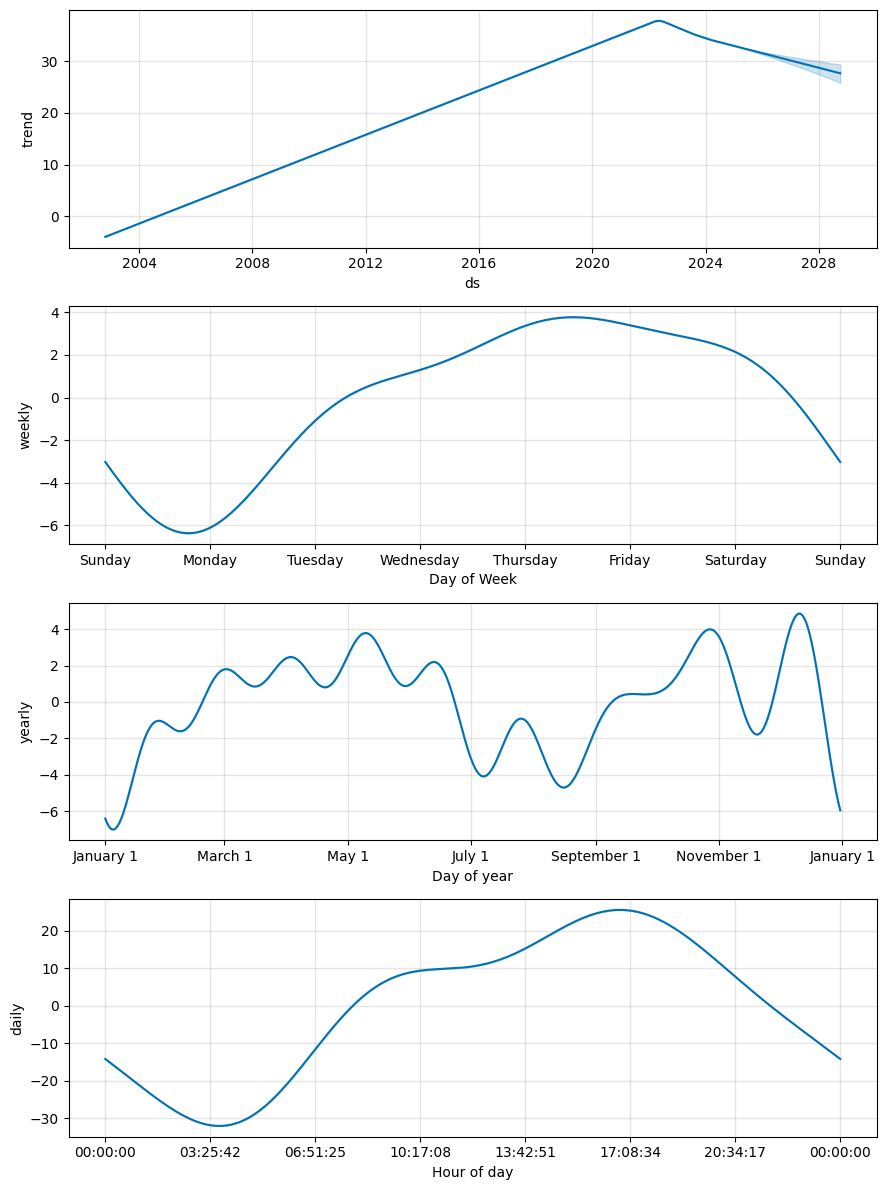

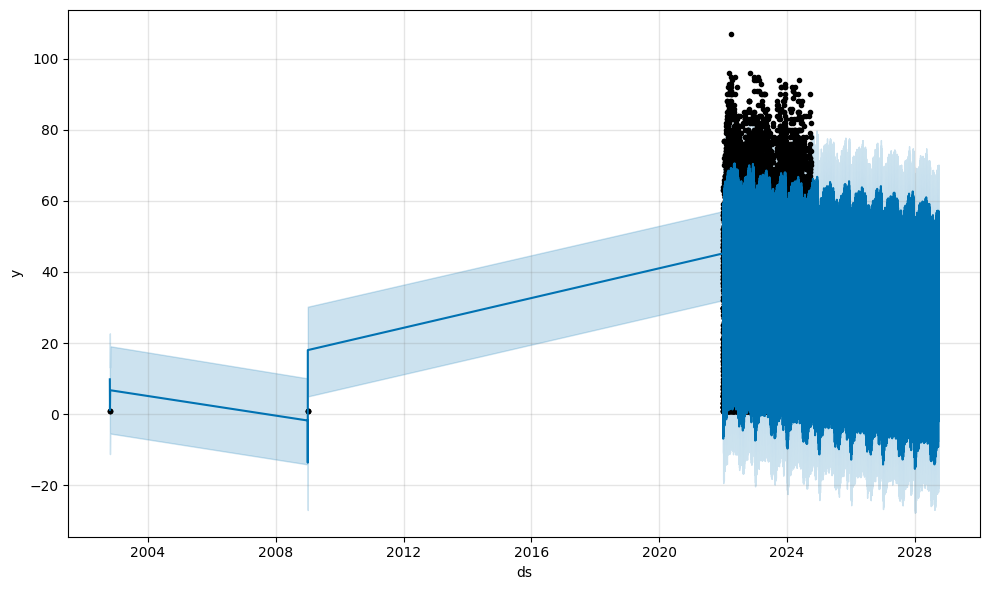

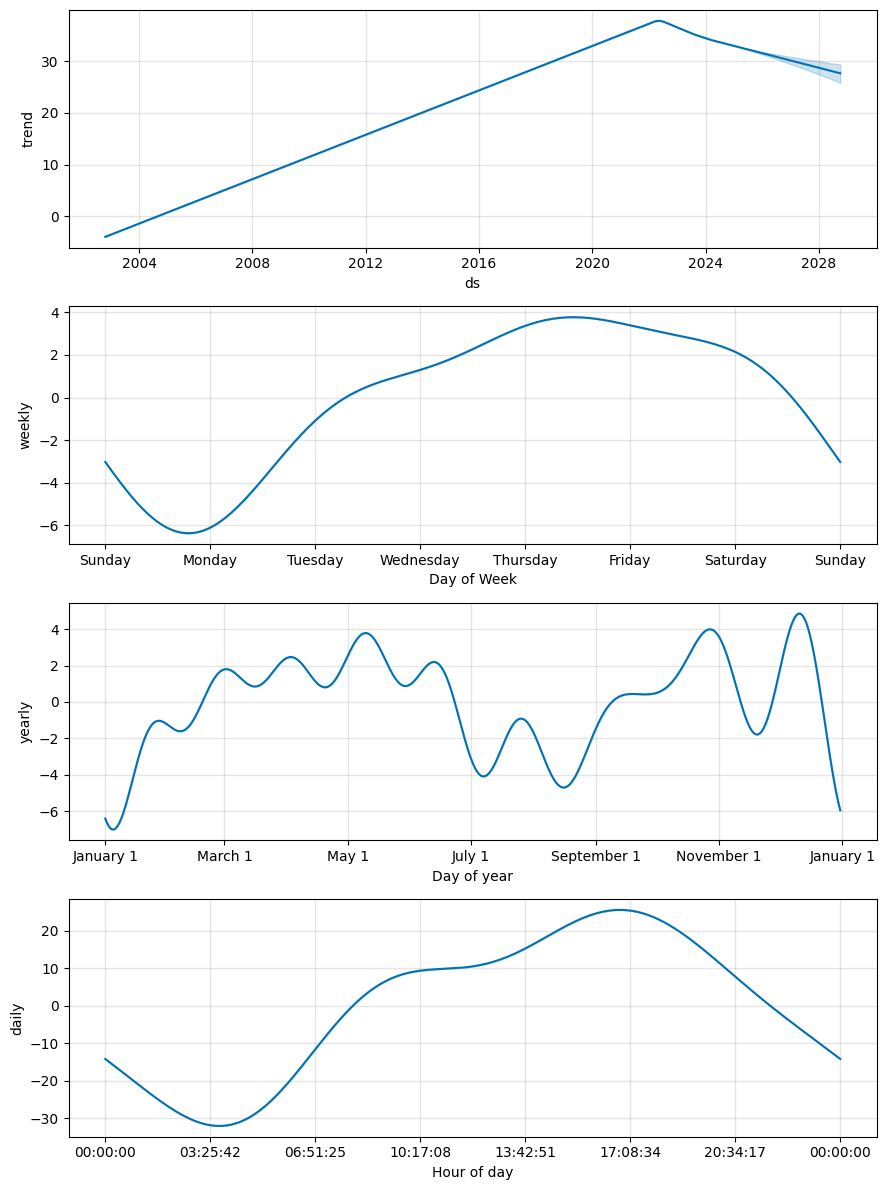

In [23]:
from prophet import Prophet
import pandas as pd

# Cargar el dataset de demanda horaria
demand_df = pd.read_csv('demandaxhora.csv')

# Renombrar columnas para Prophet
demand_df.rename(columns={'timestamp': 'ds', 'viajes_count': 'y'}, inplace=True)

# Configurar el modelo Prophet
model = Prophet()
model.fit(demand_df)

# Crear predicciones para las próximas 365 días
future = model.make_future_dataframe(periods=96 * 365, freq='H')
forecast = model.predict(future)

# Guardar el resultado
forecast.to_csv('forecast_demand.csv', index=False)

# Mostrar componentes del modelo
model.plot(forecast)
model.plot_components(forecast)

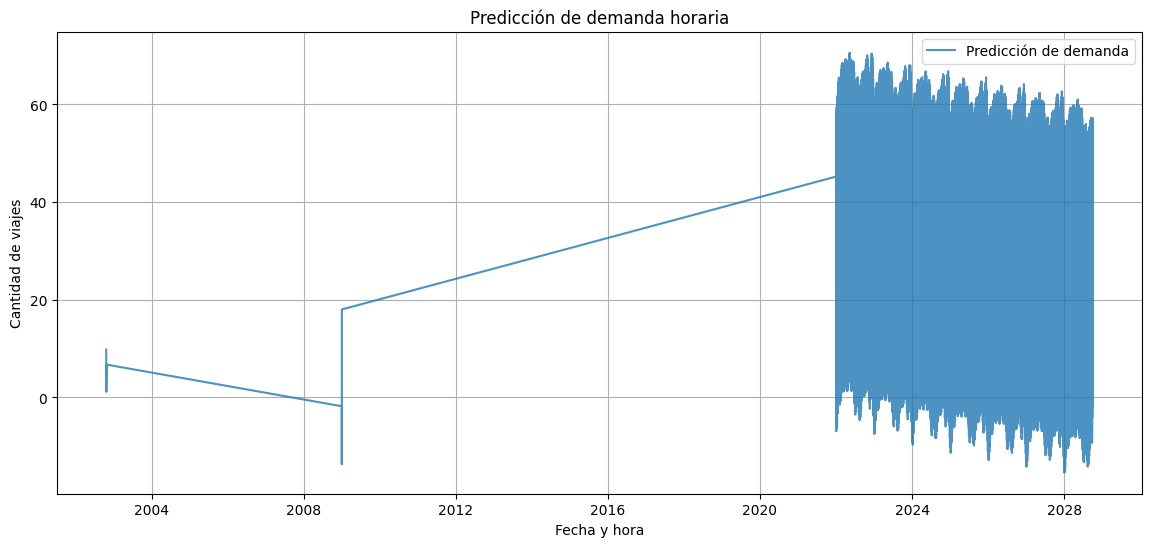

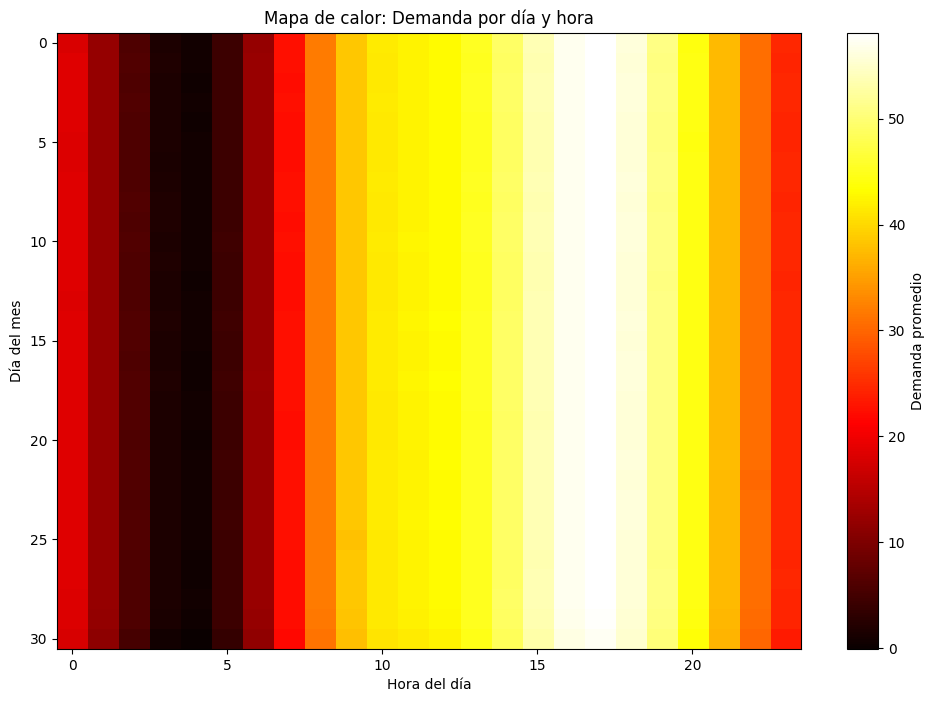

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar predicciones
forecast_df = pd.read_csv('forecast_demand.csv')

# Extraer fechas y predicciones
forecast_df['ds'] = pd.to_datetime(forecast_df['ds'])
forecast_df['hour'] = forecast_df['ds'].dt.hour
forecast_df['day'] = forecast_df['ds'].dt.day
forecast_df['month'] = forecast_df['ds'].dt.month

# Gráfico de líneas para demanda horaria
plt.figure(figsize=(14, 6))
plt.plot(forecast_df['ds'], forecast_df['yhat'], label='Predicción de demanda', alpha=0.8)
plt.title('Predicción de demanda horaria')
plt.xlabel('Fecha y hora')
plt.ylabel('Cantidad de viajes')
plt.legend()
plt.grid()
plt.show()

# Crear un mapa de calor
heatmap_data = forecast_df.groupby(['day', 'hour'])['yhat'].mean().unstack()

plt.figure(figsize=(12, 8))
plt.title('Mapa de calor: Demanda por día y hora')
plt.xlabel('Hora del día')
plt.ylabel('Día del mes')
plt.imshow(heatmap_data, cmap='hot', aspect='auto')
plt.colorbar(label='Demanda promedio')
plt.show()


# Objetivo: Predecir horarios de mayor demanda de taxis.

Pasos realizados:

1. Preprocesamiento:

    - Generamos un dataset de demanda horaria (demand_by_hour.csv).
    - Prophet usa una estructura específica: ds (timestamps) y y (cantidad de viajes por hora).

2. Entrenamiento:

    - Prophet ajustó un modelo a nuestros datos históricos.
    - Identificó patrones diarios (horarios de mayor y menor actividad) y posibles tendencias a lo largo del tiempo.

3. Predicción:

    - Generamos predicciones para las próximas 365 días (o más).
    - Prophet identificó horarios específicos con picos de demanda (por ejemplo, horas pico de transporte).


- Ventajas del modelo Prophet

    + Facilidad de uso: Automático, no requiere ajuste manual de hiperparámetros.
    + Maneja estacionalidades: Identifica patrones recurrentes en los datos.
    + Resiliencia a datos faltantes: No necesita una serie temporal perfectamente continua.
- Limitaciones
    + Datos insuficientes:
    + Si los datos no cubren suficientes ciclos (ej., varias semanas o meses), puede no capturar bien las estacionalidades.
    + Predicciones a largo plazo:
        - Tiende a suavizar predicciones en períodos largos, lo que puede no ser adecuado para eventos inesperados.
    + Asume periodicidad constante:
        - Si los patrones cambian drásticamente (por ejemplo, cambios en horarios laborales), el modelo puede fallar.

¿Por qué es útil aquí?

Prophet es ideal para identificar horarios de mayor demanda porque:

Captura patrones horarios y diarios.
Proporciona predicciones fáciles de interpretar.
Es flexible y ajustable a nuevas temporadas o cambios.
¿Quieres que analicemos más detalles técnicos, visualicemos los componentes del modelo, o comparemos con otro enfoque?